In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import svm
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
house_price_dataframe= pd.read_csv('清洗数据.csv')
house_price_dataframe =house_price_dataframe.drop('label',axis=1)
X = house_price_dataframe.drop(['Price'],axis=1)
Y = house_price_dataframe['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [3]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [4]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, Y_train)

LinearRegression()

In [5]:
Y_train_predict = regressor.predict(X_train_scaled)
r_train = metrics.r2_score(Y_train_predict, Y_train)
mse_train = mean_squared_error(Y_train_predict, Y_train)
print(r_train)
print(mse_train)

0.39289976267811866
0.46807733618720837


In [6]:
Y_test_predict = regressor.predict(X_test_scaled)
r_test = metrics.r2_score(Y_test_predict, Y_test)
mse_test = mean_squared_error(Y_test_predict, Y_test)
print(r_test)
print(mse_test)

0.3829343746338223
0.44913978591733217


In [15]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

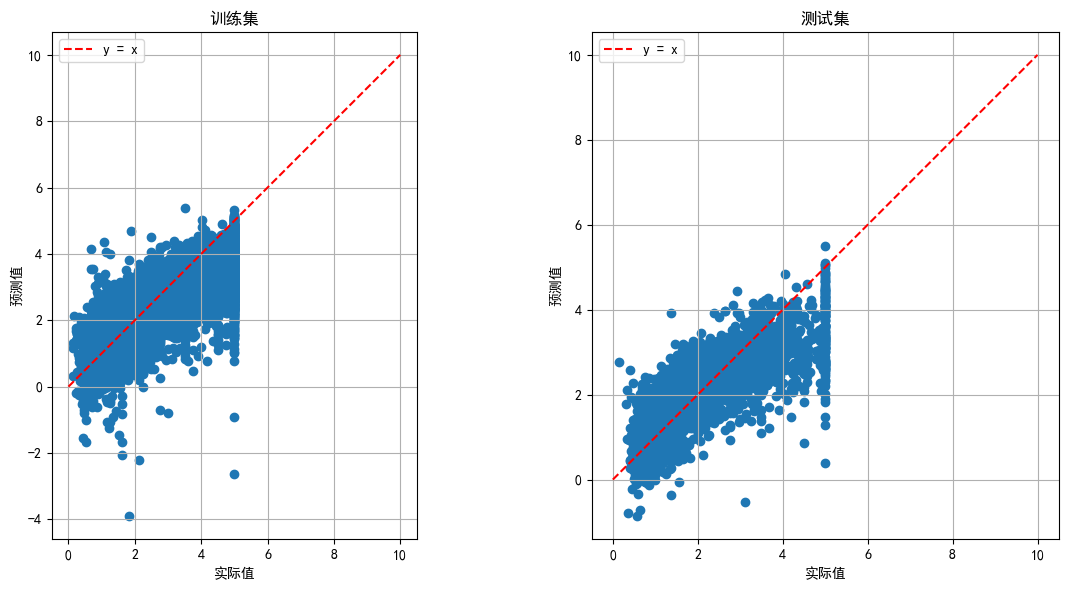

In [17]:
x_values = np.linspace(0, 10, 100)
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

ax[0].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[0].scatter(Y_train, Y_train_predict)
ax[0].set_xlabel("实际值")
ax[0].set_ylabel("预测值")
ax[0].set_title("训练集")
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend()
ax[0].grid()

ax[1].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[1].scatter(Y_test, Y_test_predict)
ax[1].set_xlabel("实际值")
ax[1].set_ylabel("预测值")
ax[1].set_title("测试集")
ax[1].set_aspect('equal', adjustable='box')
ax[1].legend()
ax[1].grid()
plt.savefig("线性回归-标准化.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()

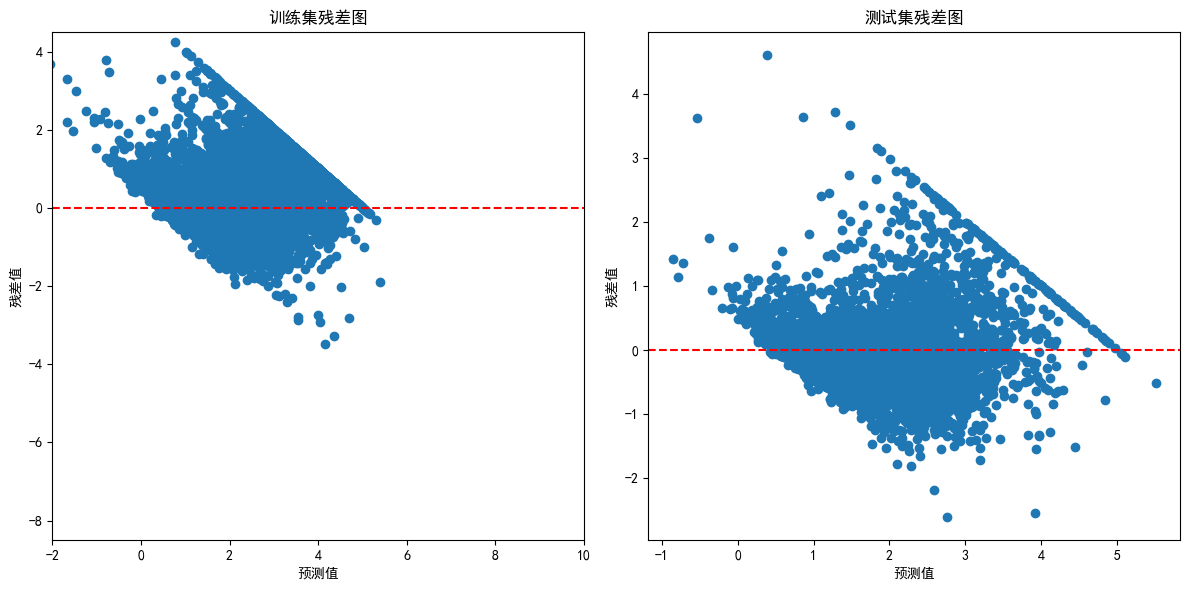

In [19]:
residuals_train = Y_train-Y_train_predict
residuals_test = Y_test-Y_test_predict
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(Y_train_predict, residuals_train)
ax[0].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[0].set_title('训练集残差图')
ax[0].set_xlabel('预测值')
ax[0].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 

ax[1].scatter(Y_test_predict, residuals_test)
ax[1].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[1].set_title('测试集残差图')
ax[1].set_xlabel('预测值')
ax[1].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 
plt.savefig("线性回归-标准化-残差.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()

In [21]:
classifier = svm.SVR()
classifier.fit(X_train_scaled,Y_train)

SVR()

In [22]:
Y_train_pred = classifier.predict(X_train_scaled)
r2_train = metrics.r2_score(Y_train,Y_train_pred)
print(r2_train)
mse_train = mean_squared_error(Y_train,Y_train_pred)
print(mse_train)

0.7681864484991614
0.28723608371617737


In [23]:
Y_test_pred = classifier.predict(X_test_scaled)
r2_test = metrics.r2_score(Y_test,Y_test_pred)
print(r2_test)
mse_test = mean_squared_error(Y_test,Y_test_pred)
print(mse_test)

0.7495868284528041
0.2985790539491981


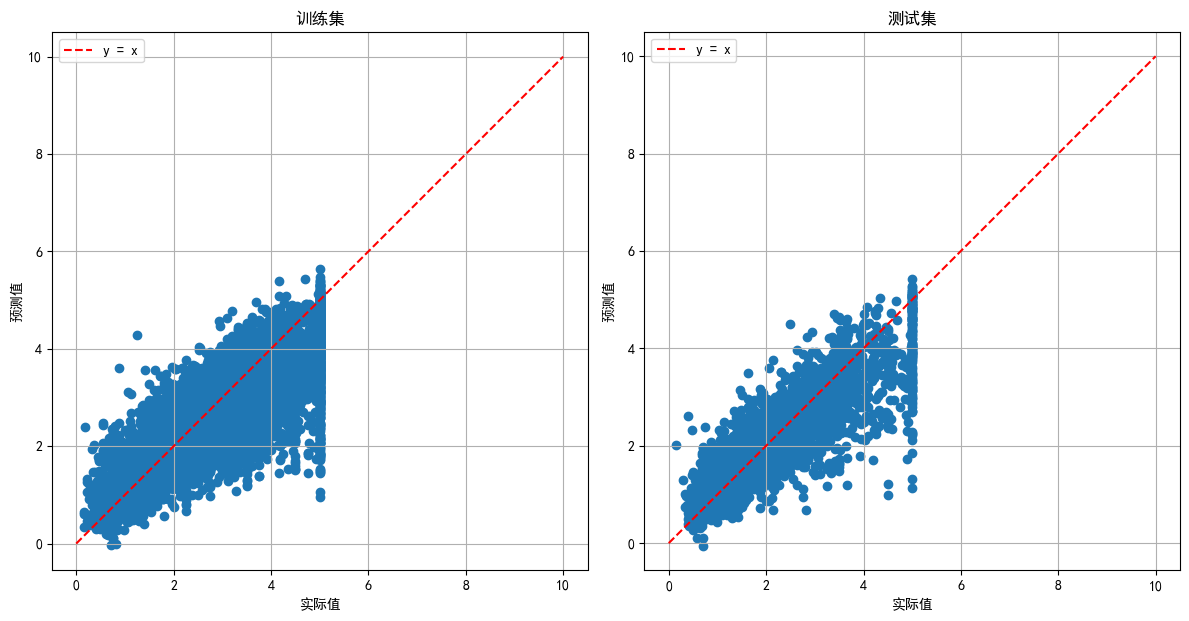

In [27]:
x_values = np.linspace(0, 10, 100)
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

ax[0].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[0].scatter(Y_train, Y_train_pred)
ax[0].set_xlabel("实际值")
ax[0].set_ylabel("预测值")
ax[0].set_title("训练集")
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend()
ax[0].grid()

ax[1].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[1].scatter(Y_test, Y_test_pred)
ax[1].set_xlabel("实际值")
ax[1].set_ylabel("预测值")
ax[1].set_title("测试集")
ax[1].set_aspect('equal', adjustable='box')
ax[1].legend()
ax[1].grid()
plt.savefig("SVR-标准化.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()

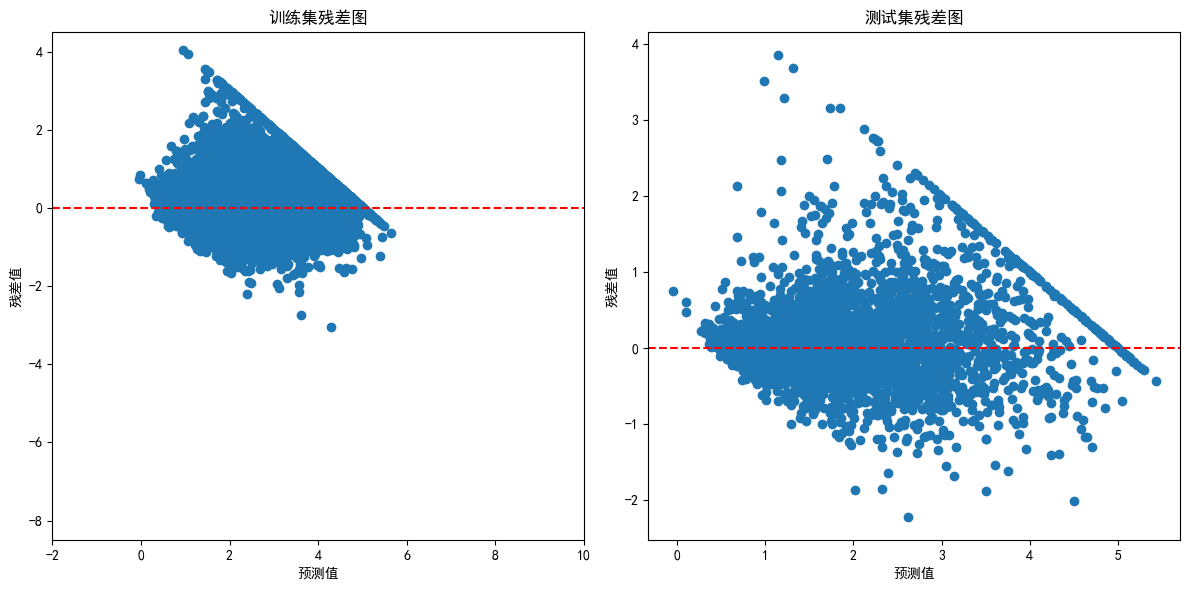

In [29]:
residuals_train = Y_train-Y_train_pred
residuals_test = Y_test-Y_test_pred
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(Y_train_pred, residuals_train)
ax[0].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[0].set_title('训练集残差图')
ax[0].set_xlabel('预测值')
ax[0].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 

ax[1].scatter(Y_test_pred, residuals_test)
ax[1].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[1].set_title('测试集残差图')
ax[1].set_xlabel('预测值')
ax[1].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 
plt.savefig("SVR-标准化-残差.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()

In [31]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # 输入层和第一个隐藏层
model.add(Dense(32, activation='relu'))  # 第二个隐藏层
model.add(Dense(1))  # 输出层，回归问题通常只有一个输出节点

In [33]:
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [35]:
history = model.fit(X_train_scaled, Y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
812/812 [==============================] - 1s 953us/step - loss: 0.6390 - val_loss: 0.3613
Epoch 2/100
812/812 [==============================] - 1s 847us/step - loss: 0.3546 - val_loss: 0.3240
Epoch 3/100
812/812 [==============================] - 1s 836us/step - loss: 0.3394 - val_loss: 0.3204
Epoch 4/100
812/812 [==============================] - 1s 829us/step - loss: 0.3285 - val_loss: 0.3111
Epoch 5/100
812/812 [==============================] - 1s 828us/step - loss: 0.3230 - val_loss: 0.3235
Epoch 6/100
812/812 [==============================] - 1s 836us/step - loss: 0.3141 - val_loss: 0.2957
Epoch 7/100
812/812 [==============================] - 1s 811us/step - loss: 0.3119 - val_loss: 0.2986
Epoch 8/100
812/812 [==============================] - 1s 837us/step - loss: 0.3075 - val_loss: 0.2887
Epoch 9/100
812/812 [==============================] - 1s 805us/step - loss: 0.3034 - val_loss: 0.2895
Epoch 10/100
812/812 [==============================] - 1s 795us/step - l

In [36]:
Y_train_pred = model.predict(X_train_scaled)
r2_train = metrics.r2_score(Y_train,Y_train_pred)
print(r2_train)
mse_train = mean_squared_error(Y_train,Y_train_pred)
print(mse_train)

508/508 [==============================] - 0s 543us/step
0.8240849197370103
0.21797327375477185


In [37]:
Y_test_pred = model.predict(X_test_scaled)
r2_test = metrics.r2_score(Y_test,Y_test_pred)
print(r2_test)
mse_test = mean_squared_error(Y_test,Y_test_pred)
print(mse_test)

127/127 [==============================] - 0s 547us/step
0.7640892468730772
0.28128715853831926


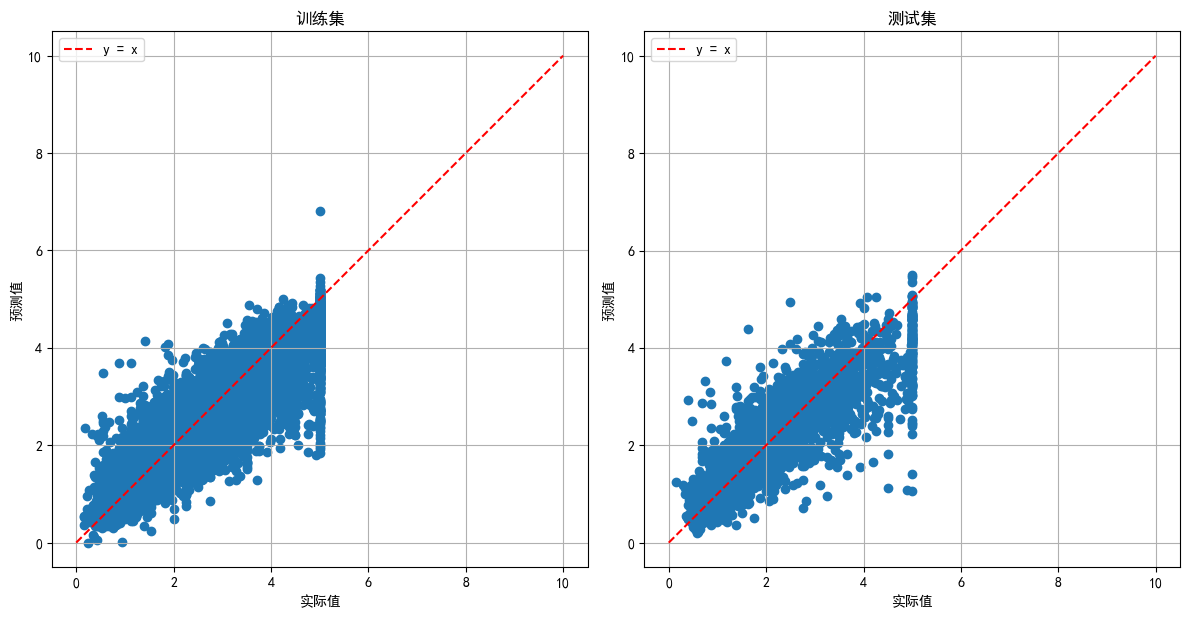

In [38]:
x_values = np.linspace(0, 10, 100)
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

ax[0].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[0].scatter(Y_train, Y_train_pred)
ax[0].set_xlabel("实际值")
ax[0].set_ylabel("预测值")
ax[0].set_title("训练集")
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend()
ax[0].grid()

ax[1].plot(x_values, x_values, color='red', linestyle='--', label='y = x')
ax[1].scatter(Y_test, Y_test_pred)
ax[1].set_xlabel("实际值")
ax[1].set_ylabel("预测值")
ax[1].set_title("测试集")
ax[1].set_aspect('equal', adjustable='box')
ax[1].legend()
ax[1].grid()
plt.savefig("NN-标准化.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()

In [45]:
Y_train.shape

(16233,)

In [53]:
Y_train_pred.shape

(16233,)

In [51]:
Y_train_pred = Y_train_pred.reshape(-1)

In [57]:
Y_test_pred = Y_test_pred.reshape(-1)

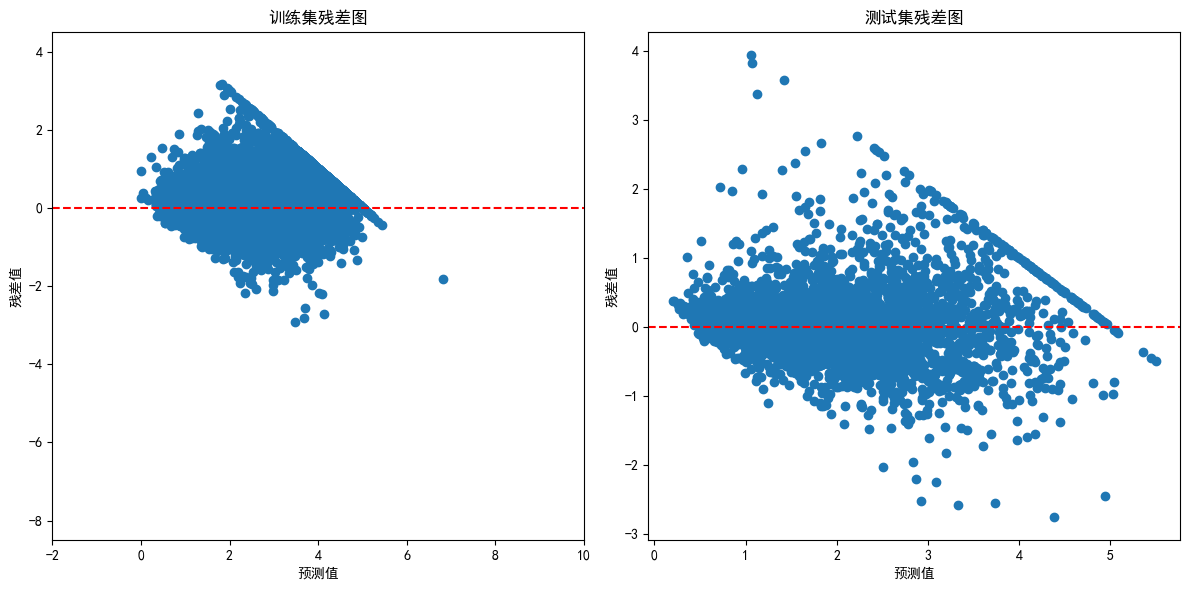

In [59]:
residuals_train = Y_train-Y_train_pred
residuals_test = Y_test-Y_test_pred
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(Y_train_pred, residuals_train)
ax[0].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[0].set_title('训练集残差图')
ax[0].set_xlabel('预测值')
ax[0].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 

ax[1].scatter(Y_test_pred, residuals_test)
ax[1].axhline(0, color='red', linestyle='--')  # 添加 y=0 的水平线
ax[1].set_title('测试集残差图')
ax[1].set_xlabel('预测值')
ax[1].set_ylabel('残差值')

ax[0].set_xlim(-2, 10)  
ax[0].set_ylim(-8.5, 4.5) 
plt.savefig("NN-标准化-残差.png", dpi=300, bbox_inches='tight') 
plt.tight_layout()
plt.show()